In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna
import seaborn as sns
import matplotlib.pyplot as plt

RND = 42


In [ ]:
df = pd.read_csv("/kaggle/input/c-data/cleaned_data.csv")

target = "Cover_Type"
X = df.drop(columns=[target]).values
y = df[target].values


In [ ]:
N = 100000

df_optuna = df.sample(n=N, random_state=RND)

X_opt = df_optuna.drop(columns=[target]).values
y_opt = df_optuna[target].values

X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(
    X_opt, y_opt, test_size=0.2, random_state=RND, stratify=y_opt
)


In [ ]:
def objective(trial):

    n_layers = trial.suggest_int("n_layers", 1, 4)

    layer_sizes = []
    for i in range(n_layers):
        layer_sizes.append(trial.suggest_int(f"layer_{i}", 32, 256))

    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    alpha = trial.suggest_float("alpha", 1e-6, 1e-2, log=True)
    lr_init = trial.suggest_float("lr_init", 1e-4, 1e-2, log=True)

    clf = Pipeline([
        ("scaler", RobustScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=tuple(layer_sizes),
            activation=activation,
            alpha=alpha,
            learning_rate_init=lr_init,
            max_iter=50,          
            solver="adam",
            random_state=RND
        ))
    ])

    clf.fit(X_train_opt, y_train_opt)
    score = clf.score(X_valid_opt, y_valid_opt)
    return score


In [6]:
# BLOCK 5 — Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, show_progress_bar=True)

print("\nBest trial score:", study.best_value)
print("Best params:", study.best_params)

params = study.best_params


[I 2025-12-07 09:41:32,873] A new study created in memory with name: no-name-db73a3b7-5506-492c-acbe-92ef0cdaa800


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:41:50,450] Trial 0 finished with value: 0.8141 and parameters: {'n_layers': 1, 'layer_0': 34, 'activation': 'tanh', 'alpha': 1.2749196402219486e-05, 'lr_init': 0.007146594029168263}. Best is trial 0 with value: 0.8141.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:43:15,563] Trial 1 finished with value: 0.9022 and parameters: {'n_layers': 4, 'layer_0': 81, 'layer_1': 181, 'layer_2': 74, 'layer_3': 237, 'activation': 'tanh', 'alpha': 0.0023742555859859737, 'lr_init': 0.0037737028186547346}. Best is trial 1 with value: 0.9022.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:45:07,909] Trial 2 finished with value: 0.92175 and parameters: {'n_layers': 4, 'layer_0': 183, 'layer_1': 99, 'layer_2': 242, 'layer_3': 135, 'activation': 'tanh', 'alpha': 1.2800347434505126e-06, 'lr_init': 0.0010363940405864545}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:46:07,056] Trial 3 finished with value: 0.8937 and parameters: {'n_layers': 3, 'layer_0': 230, 'layer_1': 79, 'layer_2': 68, 'activation': 'tanh', 'alpha': 6.211305914150612e-06, 'lr_init': 0.00410517320668965}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:47:41,594] Trial 4 finished with value: 0.892 and parameters: {'n_layers': 4, 'layer_0': 113, 'layer_1': 91, 'layer_2': 97, 'layer_3': 176, 'activation': 'relu', 'alpha': 3.414412271241648e-05, 'lr_init': 0.007854858585792946}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:52:40,909] Trial 5 finished with value: 0.8544 and parameters: {'n_layers': 4, 'layer_0': 49, 'layer_1': 161, 'layer_2': 240, 'layer_3': 213, 'activation': 'relu', 'alpha': 0.0023046134652611643, 'lr_init': 0.00019030245620485516}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:53:33,052] Trial 6 finished with value: 0.89855 and parameters: {'n_layers': 3, 'layer_0': 110, 'layer_1': 132, 'layer_2': 70, 'activation': 'tanh', 'alpha': 0.0029452805865118207, 'lr_init': 0.0007167846733392549}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:55:49,151] Trial 7 finished with value: 0.8836 and parameters: {'n_layers': 3, 'layer_0': 161, 'layer_1': 191, 'layer_2': 181, 'activation': 'relu', 'alpha': 0.0005625492698068807, 'lr_init': 0.00046651680760026855}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:57:16,035] Trial 8 finished with value: 0.84155 and parameters: {'n_layers': 3, 'layer_0': 243, 'layer_1': 92, 'layer_2': 102, 'activation': 'relu', 'alpha': 3.082625650971874e-06, 'lr_init': 0.0001683743202165852}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:58:43,096] Trial 9 finished with value: 0.8994 and parameters: {'n_layers': 4, 'layer_0': 62, 'layer_1': 73, 'layer_2': 89, 'layer_3': 199, 'activation': 'relu', 'alpha': 2.227652938362465e-06, 'lr_init': 0.0020795464576554633}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 09:59:10,383] Trial 10 finished with value: 0.826 and parameters: {'n_layers': 1, 'layer_0': 185, 'activation': 'tanh', 'alpha': 8.037734022044719e-05, 'lr_init': 0.001328566251219581}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:00:29,294] Trial 11 finished with value: 0.908 and parameters: {'n_layers': 2, 'layer_0': 198, 'layer_1': 216, 'activation': 'tanh', 'alpha': 0.0004222142576865025, 'lr_init': 0.002310465537399645}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:01:54,586] Trial 12 finished with value: 0.8817 and parameters: {'n_layers': 2, 'layer_0': 200, 'layer_1': 231, 'activation': 'tanh', 'alpha': 0.0003400175155655382, 'lr_init': 0.000435179771829707}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:03:22,387] Trial 13 finished with value: 0.915 and parameters: {'n_layers': 2, 'layer_0': 200, 'layer_1': 255, 'activation': 'tanh', 'alpha': 0.0003859242307166074, 'lr_init': 0.002003973279374983}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:03:59,478] Trial 14 finished with value: 0.8494 and parameters: {'n_layers': 2, 'layer_0': 143, 'layer_1': 36, 'activation': 'tanh', 'alpha': 0.00011881302629495157, 'lr_init': 0.0007610764339408464}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:05:36,227] Trial 15 finished with value: 0.9052 and parameters: {'n_layers': 2, 'layer_0': 219, 'layer_1': 253, 'activation': 'tanh', 'alpha': 0.007384884689032639, 'lr_init': 0.001448707268324477}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:06:02,113] Trial 16 finished with value: 0.77155 and parameters: {'n_layers': 1, 'layer_0': 165, 'activation': 'tanh', 'alpha': 1.8784456512530837e-05, 'lr_init': 0.0003154790671873441}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:07:52,344] Trial 17 finished with value: 0.91025 and parameters: {'n_layers': 3, 'layer_0': 255, 'layer_1': 122, 'layer_2': 236, 'activation': 'tanh', 'alpha': 8.46849015953097e-05, 'lr_init': 0.0033025482849405583}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:08:36,642] Trial 18 finished with value: 0.89055 and parameters: {'n_layers': 2, 'layer_0': 136, 'layer_1': 114, 'activation': 'tanh', 'alpha': 1.1922453468843864e-06, 'lr_init': 0.0010440297897700453}. Best is trial 2 with value: 0.92175.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2025-12-07 10:09:02,627] Trial 19 finished with value: 0.7416 and parameters: {'n_layers': 1, 'layer_0': 176, 'activation': 'tanh', 'alpha': 0.0008156314548977903, 'lr_init': 0.0001094499901076177}. Best is trial 2 with value: 0.92175.

Best trial score: 0.92175
Best params: {'n_layers': 4, 'layer_0': 183, 'layer_1': 99, 'layer_2': 242, 'layer_3': 135, 'activation': 'tanh', 'alpha': 1.2800347434505126e-06, 'lr_init': 0.0010363940405864545}


In [ ]:
hidden_sizes = []
for i in range(params["n_layers"]):
    hidden_sizes.append(params[f"layer_{i}"])


In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=RND, stratify=y
)

final_mlp = Pipeline([
    ("scaler", RobustScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=tuple(hidden_sizes),
        activation=params["activation"],
        alpha=params["alpha"],
        learning_rate_init=params["lr_init"],
        max_iter=300,
        solver="adam",
        random_state=RND
    ))
])

final_mlp.fit(X_train_full, y_train_full)


Pipeline(steps=[('scaler', RobustScaler()),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=1.2800347434505126e-06,
                               hidden_layer_sizes=(183, 99, 242, 135),
                               learning_rate_init=0.0010363940405864545,
                               max_iter=300, random_state=42))])

In [9]:
# BLOCK 8 — Evaluate the final model
y_pred = final_mlp.predict(X_test_full)

print("Test Accuracy:", accuracy_score(y_test_full, y_pred))
print("\nClassification Report:\n", classification_report(y_test_full, y_pred))


Test Accuracy: 0.9544914804267027

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.96      0.95     38948
           2       0.97      0.96      0.96     50704
           3       0.95      0.94      0.95      5472
           4       0.87      0.88      0.87       451
           5       0.84      0.88      0.86      1702
           6       0.91      0.93      0.92      2930
           7       0.94      0.96      0.95      3378

    accuracy                           0.95    103585
   macro avg       0.92      0.93      0.92    103585
weighted avg       0.95      0.95      0.95    103585



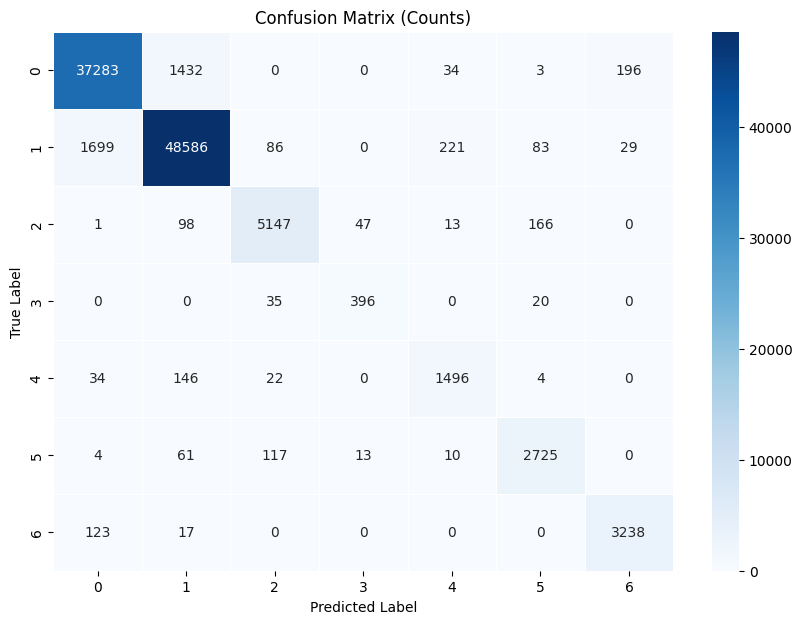

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test_full, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
